# Task 2 : Reconstructing using Random Fourier Features (RFF) [3 marks]

## Question 1

Image Reconstruction - Choose any image you like. Use Random Fourier Features (RFF) and Linear Regression to learn the mapping from the image coordinates (X, Y) to the pixel colors (R, G, B). Here, (X, Y) represents the coordinates of the pixels, and (R, G, B) represents the color values at those coordinates. Display both the original image and the reconstructed image. Also, calculate and report the Root Mean Squared Error (MSE) and Peak Signal-to-Noise Ratio (PSNR) between the original and reconstructed images. [1.5 Mark]

## RFF: Random Fourier Features

Random Fourier Features (RFF) is a technique used to approximate kernel functions in machine learning, especially in kernel-based methods like Support Vector Machines (SVM) or Gaussian Processes. Here, we are particularly interested in Gaussian Processes.

Kernel functions basically help in transforming data into a higher-dimensional space to make it easier to separate or learn patterns. However, directly using these kernels can be computationally expensive. RFF offers a way to make this process faster and more scalable.

Before diving into RFF, let's quickly go over what kernel functions are:

Kernel Functions compute the similarity between pairs of data points. For example, the Gaussian (RBF) kernel measures the similarity between two points based on their distance.

#### Gaussian (RBF) Kernel

$$
K(x, x') = \exp \left( -\frac{\| x - x' \|^2}{2 \sigma^2} \right)
$$

This kernel measures similarity based on the distance between $ x $ and $ x' $. It transforms data into a high-dimensional space where even subtle differences can be captured. $ \sigma $ is a parameter that controls the width of the Gaussian function.

By applying a kernel function, the data can be implicitly transformed into a higher-dimensional space, where it might become easier to separate with a linear decision boundary. This is known as the "kernel trick."

**A kernel function helps find patterns or relationships in your data that aren’t obvious in their original form by "lifting" them to a new space where things are easier to understand**.

<img src="./SCR-20240909-onej.png" width=1000>

Image Reconstruction: Each pixel in the image has coordinates (X, Y).
We want to figure out how to set the values of (R, G, B) at each coordinate, rather than memorizing every single pixel.

#### How does this relate to image reconstruction and how do we use this to reconstruct the image?

An image can be considered a 2D function, where the input is the pixel coordinates (x, y) and the output is the pixel color (R, G, B).

For each pixel in the image, we can use its coordinates (x, y) as the input to the RFF feature map.

Apply the RFF feature map to each pixel's coordinates, obtaining a high-dimensional feature vector.

Now, we learning a mapping where training data is a dataset where each sample consists of RFF features of a pixel's coordinates and the output is pixel color at that location.

We use linear regression to train a model on this dataset. The model will learn a mapping from the RFF features to the pixel intensities.

The linear regression model learns a linear mapping from the high-dimensional RFF features to the pixel intensities.

Now, to reconstruct or predict the image, for each pixel in the reconstructed image, we compute its RFF features and then sse the trained linear regression model to predict the pixel color based on the RFF features.


## Kernel Functions

Kernel functions are all fun and games until we have to compute them. Traditional kernel methods involve computing the kernel matrix, which requires calculating the similarity between every pair of data points. This results in a computational cost that grows rapidly with the number of data points, making it infeasible for large datasets.

RFF provides a way to approximate these kernels using a low-dimensional mapping that is easier to compute.

#### Fourier Transform of a function f(t):

The Fourier transform of a function $f(t)$ is given by:

$$
F(\omega) = \int_{-\infty}^{\infty} f(t) , e^{-i \omega t} , dt,
$$

where:

- $F(\omega)$ is the Fourier transform of the function $f(t)$.
- $f(t)$ is the original time-domain function.
- $\omega$ is the angular frequency (in radians per second).
- $i$ is the imaginary unit (where $i^2 = -1$).
- $e^{-i \omega t}$ is the complex exponential function.

Now, the Gaussian Distribution is given as:

$$
f(t) = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(t - \mu)^2}{2 \sigma^2}}
$$

where:

- $f(x)$ is the probability density function of the Gaussian distribution.
- $\mu$ is the mean of the distribution.
- $\sigma$ is the standard deviation.
- $\sigma^2$ is the variance.
- $e$ is the base of the natural logarithm.

Complete this math...
The Radial Basis Function is given by:

$$
K(x, y) = \exp\left(-\frac{\|x - y\|^2}{2 \sigma^2}\right)
$$

The Bochner theorem states that any positive definite function can be represented as a Fourier integral. This means we can express the RBF kernel as a Fourier integral:

$$
K(x, y) = \int p(\omega) \cdot \exp(i\omega (x - y)) \, d\omega
$$

where $p(\omega)$ is the probability density function.

To approximate this integral, we can use a Monte Carlo approximation:

$$
K(x, y) \approx \frac{1}{N} \sum_{i=1}^N \exp(i\omega_i (x - y))$$

where $\omega_i$ are random samples drawn from the probability density function.

If we choose $p(\omega)$ to be a Gaussian distribution with mean 0 and variance 1 / (2 * sigma^2), we get:

$$
K(x, y) \approx \frac{1}{N} \sum_{i=1}^N \exp(i\omega_i (x - y))
$$

where $\omega_i$ are drawn from a Gaussian distribution with mean 0 and variance 1 / (2 * sigma^2).

Now, we can rewrite this as using Euler's formula:

$$
K(x, y) \approx \frac{1}{N} \sum_{i=1}^N [\cos(\omega_i (x - y)) + i \sin(\omega_i (x - y))]
$$

By separating the real and imaginary parts and rescaling, we reach this approximation of RBF using RFF:


$$
k(x, y) \approx \frac{1}{D} \sum_{i=1}^{D} \cos(w_i \cdot (x - y))
$$

where:

- k(x, y) represents the kernel function.
- D is the total number of dimensions.
- w_i is a vector in the i-th dimension.
- x and y are input vectors.

The more random samples D we use, the closer our approximation will be to the true RBF kernel.

After approximating the RBF kernel using Random Fourier Features (RFF), we use the transformation z(x) to map each input data point x to a lower-dimensional feature space. This new feature space is usually much smaller in dimension than the original space required to compute the full RBF kernel matrix.

Instead of using kernel-based algorithms (like the Kernel SVM or Kernel Ridge Regression), use linear algorithms on the transformed features Z.

For example, we can now use linear regression with the new features. Because the kernel function is approximated in this lower-dimensional space, linear algorithms can now approximate the behavior of their nonlinear counterparts.

The result is an approximation of the original nonlinear kernel function with a linear model that is much easier to compute.



---



A kernel defines an $N \times N$ covariance matrix whose $(i, j)$th entry is $K(x_i, x_j)$.  This means that the kernel is symmetric positive definite.  The function $K(x_i, x_j)$ can take various forms, such as the standard Gaussian kernel or the radial basis function kernel.

On taking the fourier transform of this kernel, we get a probability distribution from which $\omega_i$ is sampled, hence the word "random".



#### Metrics for Evaluation

1. Root Mean Squared Error (RMSE): Measures the average squared difference between the original and reconstructed data (either pixel colors or audio amplitudes). Lower RMSE indicates better reconstruction.

$$
RMSE = \sqrt{\frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}}
$$

2. Peak Signal-to-Noise Ratio (PSNR): Used for images; higher PSNR generally indicates better image reconstruction quality.

$$
PSNR = 20 \log_{10}\left(\frac{MAX_I}{RMSE}\right)
$$

It quantifies the distortion introduced by compression, noise, or other signal processing operations.

Higher PSNR values indicate less distortion.
Higher PSNR often translates to a visually clearer and more pleasing image.
Higher PSNR generally implies better compression with less information loss.

---

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import pairwise_distances
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

# Remove all the warnings
import warnings
warnings.filterwarnings('ignore')

# Set env CUDA_LAUNCH_BLOCKING=1
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Retina display
%config InlineBackend.figure_format = 'retina'

try:
    from einops import rearrange
except ImportError:
    %pip install einops
    from einops import rearrange

In [2]:
def load_image(path):
  if (os.path.exists(path)):
    # read the image using torchvision and convert it to tensor because the model expects a tensor
    img = torchvision.io.read_image(path)
    print("Tensor shape: ", img.shape)
    # rearrange the image to be in the expected format i.e. (H W C)
    plt.imshow(rearrange(img, 'c h w -> h w c').numpy())
    return img
  else:
    print("File not found")
    return None

In [5]:
image_path = "images/borgir.jpg"
image = load_image(image_path)

File not found


In [ ]:
def normalize_image(image): # normalize the image to 0 - 1 values
  # store the shape of the original image for future use
  original_image = image.shape
  scaler = preprocessing.MinMaxScaler()
  # flatten
  image = image.reshape(-1, 1)
  scaler.fit(image)
  scaled_image = scaler.transform(image).reshape(original_image)
  return scaled_image

In [ ]:
def crop_image(image, crop_size, start_x, start_y): # crop a given image tensor with specified crop size and x, y start values
  cropped_image = torchvision.transforms.functional.crop(image.cpu(), start_x, start_y, crop_size, crop_size) # x.cpu() moves the tensor from gpu to cpu
  print("Cropped image shape: ", cropped_image.shape)
  plt.imshow(rearrange(cropped_image, 'c h w -> h w c').cpu().numpy())
  return cropped_image

Cropped image shape:  torch.Size([3, 200, 200])


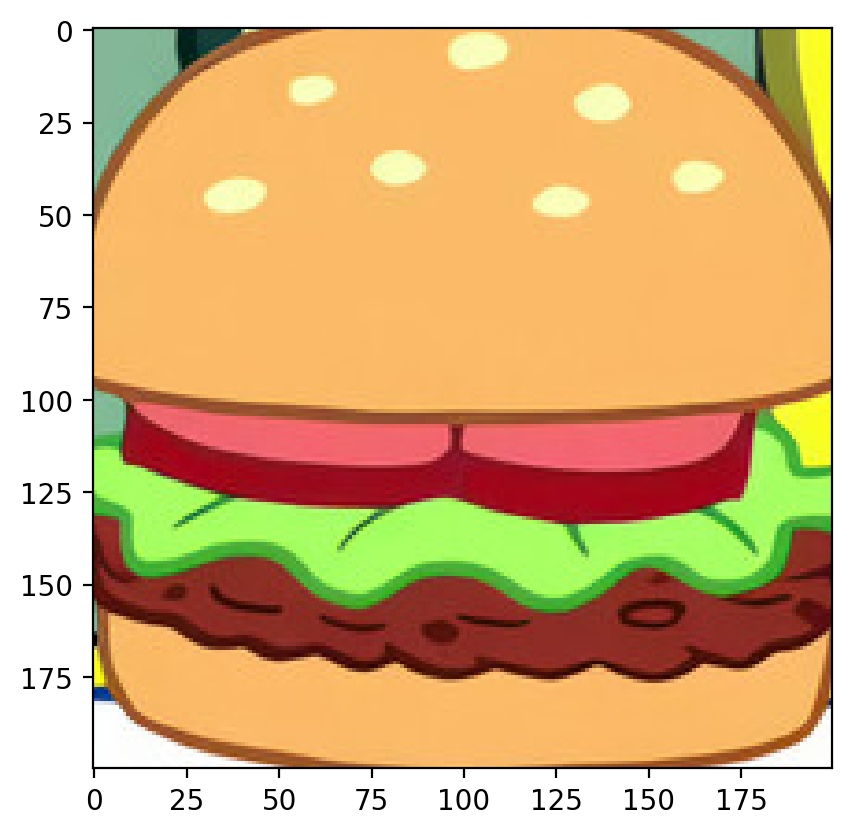

In [ ]:
normalized_image = normalize_image(image)
torch_image = torch.tensor(normalized_image)
cropped_image = crop_image(torch_image, 200, 575, 705)

In [ ]:
def extract_coordinates_pixels(image): # given an image this function returns coords array and their corresponding pixel values
  channels, height, width = image.shape
  coords = []

  for y in range(height):
    for x in range(width):
      coords.append([x, y])

  coords = torch.tensor(coords, dtype=torch.float32)
  pixel_values = rearrange(image, 'c h w -> (h w) c').float()

  print("Coordinates shape: ", coords.shape)
  print("Pixel values shape: ", pixel_values.shape)
  return coords.to(device), pixel_values.to(device)

In [ ]:
coords, pixels = extract_coordinates_pixels(cropped_image)

Coordinates shape:  torch.Size([40000, 2])
Pixel values shape:  torch.Size([40000, 3])


In [ ]:
def normalize_tensor(tensor): # given a tensor, this function normalizes it to -1 to 1 range
    scalar = preprocessing.MinMaxScaler(feature_range=(-1, 1))
    # tensor = tensor.reshape(-1, 1)
    scalar.fit(tensor.cpu())
    scaled_tensor = scalar.transform(tensor.cpu()).reshape(tensor.shape)
    scaled_tensor = torch.tensor(scaled_tensor, dtype=torch.float32).to(device)
    return scaled_tensor

In [ ]:
coords = normalize_tensor(coords)

In [ ]:
def create_linear_model(input_dim, output_dim):
  return nn.Linear(input_dim, output_dim).to(device) # nn is the neural network module, Linear creates a linear layer of it

Efficiency: Adam is known for its computational efficiency and relatively low memory requirements, making it suitable for training deep learning models, especially with large datasets.

Adaptability: Adam adapts the learning rate for each parameter individually, which can lead to faster convergence and better performance compared to optimizers with fixed learning rates.

Momentum: Adam incorporates momentum, which helps to accelerate the optimization process and navigate through areas of the loss function with flat gradients.

In [ ]:
def train(coords, pixels, model, learning_rate=0.01, epochs=1000, threshold=1e-6, verbose=True):

    criterion = nn.MSELoss() # define the loss function (mse)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # use the adam optimizer with the specified learning rate
    previous_loss = float('inf') # initialize w very large value (for early stopping)

    # training loops
    for epoch in range(epochs):
        optimizer.zero_grad() # reset the gradient of the optimizer
        outputs = model(coords) # compute the output
        loss = criterion(outputs, pixels) # calculate the loss that we defined earlier
        loss.backward() # compute teh gradients of the loss with respect to the parameters
        optimizer.step() # update the parameters based on the gradients computed above

        # check for early stopping
        if abs(previous_loss - loss.item()) < threshold:
            print(f"Stopping early at epoch {epoch} with loss: {loss.item():.6f}")
            break

        previous_loss = loss.item() # update the previous loss

        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch} loss: {loss.item():.6f}")

    return loss.item()


Why are we setting model to evaluation mode?

When we train a neural network, certain layers like dropout and batch normalization behave differently to help the model learn better.

Dropout randomly turns off some neurons to prevent overfitting.
Batch normalization adjusts and scales the output based on the batch of data being processed to help with training stability.

However, during evaluation (when we use the model to make predictions), we don't want these layers to behave this way.

Instead, you want them to use their learned settings from training without any randomness.

Basically, it tells the model that you are in evaluation mode, not training mode.



In [ ]:
def plot_reconstructed_and_original_image(original_image, model, coords, title=""):

    num_channels, height, width = original_image.shape
    model.eval() # set the model to evaluation mode which disables dropout and batch normalization which are just features required for training and not for testing
    with torch.no_grad(): # disable gradient calculation as we don't need it for visualizing to speed up the process
        outputs = model(coords)
        outputs = outputs.reshape(height, width, num_channels)

    fig = plt.figure(figsize=(6, 4))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1]) # this allows us to create a flexible grid layout for plotting multiple subplots

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])

    ax0.imshow(outputs.cpu())
    ax0.set_title("Reconstructed Image")

    ax1.imshow(original_image.cpu().permute(1, 2, 0))
    ax1.set_title("Original Image")

    for a in [ax0, ax1]:
        a.axis("off")

    fig.suptitle(title, y=0.9)
    plt.tight_layout()

The following function generates Random Fourier Features (RFF) from an input tensor to approximate a kernel function (the guassian or radial basis function in our case).

The RBF kernel formula is:

$$
K(x, x') = \exp\left(-\frac{\|x - x'\|^2}{2\sigma^2}\right)
$$

where:
- $ K(x, x') $ is the kernel value between two input vectors $ x $ and $ x' $.
- $ \|x - x'\|^2 $ is the squared Euclidean distance between the vectors $ x $ and $ x' $.
- $ \sigma $ is the kernel width parameter (often called the "bandwidth").

It basically tries to capture non-linear relationships by transforming the input tensor into a new feature space using RFF.

num_features is the number of random fourier features to generate. The choice of this number significantly affects both the performance and the computational cost. There isn't any general number or a formula for this but rather a trade-off between approximation and computation cost. The more features we generate, the better approximation we get but the computation cost increases significantly as well.

The parameter 𝜎 determines the "width" of the gaussian function used in the RBF kernel. A smaller value results in a narrow gaussian function meaning the kernel will only consider points that are very close to each other as similar which can lead to overfitting. A larger value means that kernel will consider points that are far apart as similar which can lead to underfitting.

In determining the optimal σ value for the RBF kernel, we utilized a combination of empirical testing and heuristic methods. We explored a range of σ values, both large and small, to observe their effects on model performance. Despite our efforts, no general formula for σ emerged, and consultations with our instructor and teaching assistants did not provide a definitive solution.

From our experiments, we figured that we have to sync our input data and the sigma in some way. Since we have normalized our input from -1 to 1, we have to set the sigma accordingly.

In [ ]:
# create RFF features
def create_rff_features(tensor, num_features, sigma):
    rff = RBFSampler(n_components=num_features, gamma=1/(2 * sigma**2)) # create an RBFSampler object with specified number of features and gamma value
    tensor = tensor.cpu().numpy()
    tensor = rff.fit_transform(tensor) # apply the RBFSampler to transform the tensor
    return torch.tensor(tensor, dtype=torch.float32).to(device)

In [ ]:
image_rff = create_rff_features(coords, 20000, 0.01) # parameters are coordinates, number of features, and sigma

In [ ]:
image_rff.shape

torch.Size([40000, 20000])

In [ ]:
model = create_linear_model(image_rff.shape[1], 3) # create the linear model
model.to(device)

train(image_rff, pixels, model, learning_rate=0.01, epochs=1000, threshold=1e-9, verbose=True) # train the model

Epoch 0 loss: 0.438960
Epoch 100 loss: 0.016970
Epoch 200 loss: 0.005865
Epoch 300 loss: 0.002514
Epoch 400 loss: 0.001212
Epoch 500 loss: 0.000736
Epoch 600 loss: 0.000578
Epoch 700 loss: 0.000529
Epoch 800 loss: 0.000514
Epoch 900 loss: 0.000508


0.0005041750846430659

The RFF features might be discretized or quantized during the feature extraction process. This means that the continuous values of the RFF features are rounded to a finite set of discrete values. This discretization can introduce artifacts in the reconstructed image, especially if the discretization is too coarse.

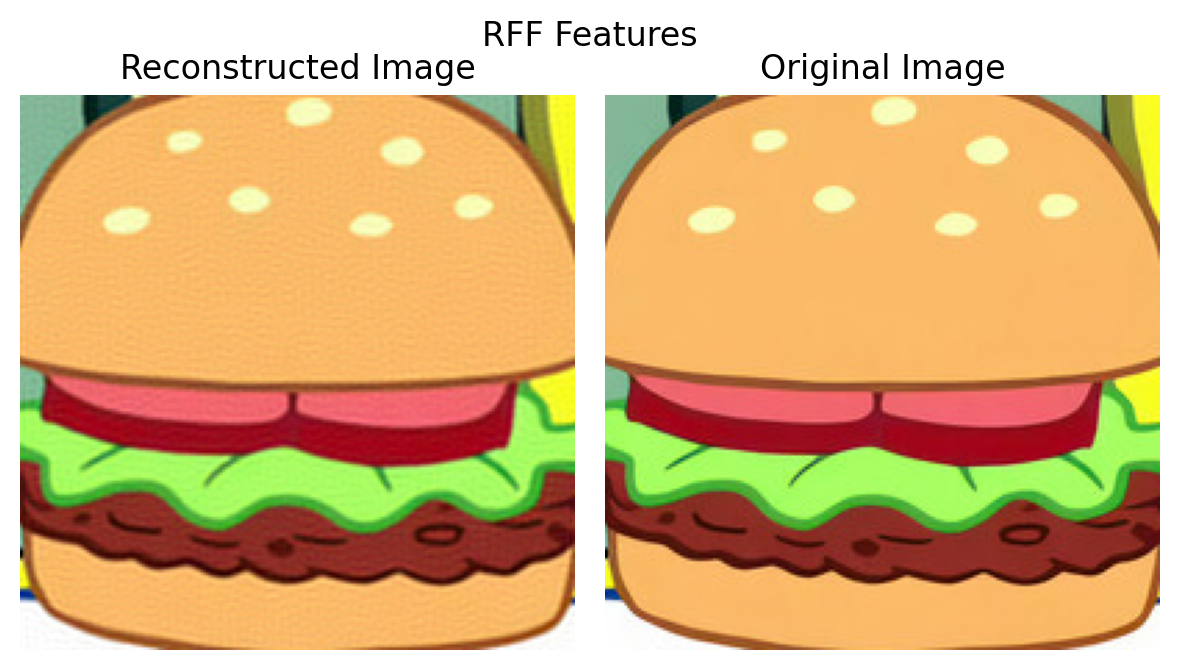

In [ ]:
plot_reconstructed_and_original_image(cropped_image, model, image_rff, title="RFF Features")

In [ ]:
def get_reconstructed_image(model, coords, image_rff, height, width):
  model.eval()
  with torch.no_grad():
    outputs = model(image_rff)
    outputs = outputs.reshape(height, width, 3)
  return outputs

In [ ]:
reconstructed_image = get_reconstructed_image(model, coords, image_rff, 200, 200)
reconstructed_image = rearrange(reconstructed_image, 'c h w -> w h c').cpu()

In [ ]:
!pip install torchmetrics

from torchmetrics.functional.image import peak_signal_noise_ratio
from torchmetrics.functional.regression import mean_squared_error

# Calculate and report the RMSE and PSNR metrics.
def metrics(cropped_image, image_rff):
    rmse = mean_squared_error(target = cropped_image,
                             preds=image_rff,
                             squared=False)
    psnr = peak_signal_noise_ratio(target=cropped_image,
                                   preds=image_rff)
    return rmse, psnr

In [ ]:
rmse, psnr = metrics(cropped_image.transpose(1, 2).reshape(-1, 1), reconstructed_image.reshape(-1, 1))
print("RMSE: ", rmse)
print("PSNR: ", psnr)

RMSE:  tensor(0.0225, dtype=torch.float64)
PSNR:  tensor(32.9744, dtype=torch.float64)
